<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-тарифов" data-toc-modified-id="Описание-тарифов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание тарифов</a></span></li></ul></li><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Первая-гипотеза" data-toc-modified-id="Первая-гипотеза-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Первая гипотеза</a></span></li><li><span><a href="#Вторая-гипотеза" data-toc-modified-id="Вторая-гипотеза-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вторая гипотеза</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
### Описание тарифов  
* **Тариф «Смарт»**  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

* **Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Вкключено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей  

  Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение и подготовка данных

In [1]:
%pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
file_list = ['calls', 'internet', 'messages', 'tariffs', 'users']
file_dict =  dict.fromkeys(file_list)
for i in file_dict:
    pth1 = i + '.csv'
    pth2 = '/datasets/' + i + '.csv'

    if os.path.exists(pth1):
        file_dict[i] = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        file_dict[i] = pd.read_csv(pth2)
    else:
        print('Something is wrong')


In [4]:
df_users = file_dict['users']
df_users 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
df_users.describe(include='object')

,churn_date,city,first_name,last_name,reg_date,tariff
count,38,500,500,500,500,500
unique,33,76,246,419,270,2
top,2018-12-21,Москва,Радим,Андреенко,2018-05-28,smart
freq,2,99,6,5,8,351


In [7]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [8]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users[['churn_date', 'reg_date']].describe()

,churn_date,reg_date
count,38,500
unique,33,270
top,2018-10-03 00:00:00,2018-05-28 00:00:00
freq,2,8
first,2018-08-17 00:00:00,2018-01-01 00:00:00
last,2018-12-30 00:00:00,2018-12-31 00:00:00


Таблица `users` содержит информацию о пользователях. Пропуски  в столбце `churn_date` означают, что тариф ещё действовал на момент выгрузки данных. Столбцы `churn_date` и `reg_date` приведены к типу `datetime`.

In [9]:
df_calls = file_dict['calls']
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [10]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [11]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['call_date'].describe()

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

In [13]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


Таблица `calls` содержит информацию о звонках. Таблица не содержит пропусков и дубликатов. Cтолбец `call_date` преобразован к типу `datetime`. Значения столбца `duration` для каждого звонка округлены вверх до целой минуты, в соответствие с описанием проекта

In [14]:
df_internet = file_dict['internet']
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [15]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [16]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [17]:
df_internet.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

In [18]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['session_date'].describe()

count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

Таблица `internet` содержит информацию об интернет-сессиях. Таблица не содержит пропусков и дубликатов. Столбец `session_date` приведен к типу `datetime`.

In [19]:
df_messages = file_dict['messages']
df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [20]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [21]:
df_messages.describe(include='all')

,id,message_date,user_id
count,123036,123036,123036.000000
unique,123036,364,NaN
top,1241_62,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,1256.989410
std,NaN,NaN,143.523967
min,NaN,NaN,1000.000000
25%,NaN,NaN,1134.000000
50%,NaN,NaN,1271.000000
75%,NaN,NaN,1381.000000


In [22]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

Таблица `messages` содержит информацию о сообщениях. Таблица не содержит пропусков и дубликатов. Столбец `message_date` приведен к типу `datetime`.

In [23]:
df_tariffs = file_dict['tariffs']
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [24]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [25]:
df_tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)

Таблица `tariffs` содержит информацию о тарифах компании. Таблица не содержит пропусков и дубликатов. Столбец `tariff_name` переименован на `tariff` для единообразия с таблицей `users`

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [26]:
df_calls = df_users.merge(df_calls, how='left', on='user_id')
df_calls

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,3.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,6.0
...,...,...,...,...,...,...,...,...,...,...,...
202610,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_215,2018-12-26,1.0
202611,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_216,2018-10-18,19.0
202612,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_217,2018-11-10,11.0
202613,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_218,2018-10-06,5.0


In [27]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.0,7.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.0,8.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,3.0,6.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,14.0,9.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,6.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202610,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_215,2018-12-26,1.0,12.0
202611,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_216,2018-10-18,19.0,10.0
202612,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_217,2018-11-10,11.0,11.0
202613,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_218,2018-10-06,5.0,10.0


In [28]:
df_calls_pivot = (df_calls.pivot_table(index=['user_id', 'month'], 
                    values=['tariff', 'call_date', 'duration'],
                    aggfunc={'tariff':'first', 'call_date':'count', 'duration':'sum'}))
df_calls_pivot.rename(columns={'call_date':'count_calls'}, inplace=True)
df_calls_pivot.reset_index(inplace=True)
df_calls_pivot

,user_id,month,count_calls,duration,tariff
0,1000,5.0,22,159.0,ultra
1,1000,6.0,43,172.0,ultra
2,1000,7.0,47,340.0,ultra
3,1000,8.0,52,408.0,ultra
4,1000,9.0,58,466.0,ultra
...,...,...,...,...,...
3169,1498,10.0,41,247.0,smart
3170,1499,9.0,9,70.0,smart
3171,1499,10.0,68,449.0,smart
3172,1499,11.0,74,612.0,smart


Посчитаем выручку с каждого пользователя за каждый месяц за счет превышения лимита длительности звонков

In [29]:
df_calls_pivot = df_calls_pivot.merge(df_tariffs[['minutes_included', 'rub_per_minute', 'tariff']], how='left', on='tariff')

In [30]:
df_calls_pivot['minutes_over'] = df_calls_pivot['duration'] - df_calls_pivot['minutes_included']
df_calls_pivot['calls_revenue'] = (df_calls_pivot.apply(lambda x: x['minutes_over'] * x['rub_per_minute'] 
                                                        if x['minutes_over'] > 0 else 0, axis=1))
df_calls_pivot

,user_id,month,count_calls,duration,tariff,minutes_included,rub_per_minute,minutes_over,calls_revenue
0,1000,5.0,22,159.0,ultra,3000,1,-2841.0,0.0
1,1000,6.0,43,172.0,ultra,3000,1,-2828.0,0.0
2,1000,7.0,47,340.0,ultra,3000,1,-2660.0,0.0
3,1000,8.0,52,408.0,ultra,3000,1,-2592.0,0.0
4,1000,9.0,58,466.0,ultra,3000,1,-2534.0,0.0
...,...,...,...,...,...,...,...,...,...
3169,1498,10.0,41,247.0,smart,500,3,-253.0,0.0
3170,1499,9.0,9,70.0,smart,500,3,-430.0,0.0
3171,1499,10.0,68,449.0,smart,500,3,-51.0,0.0
3172,1499,11.0,74,612.0,smart,500,3,112.0,336.0


Проведем аналогичные расчеты для сообщений и интернета.

In [31]:
df_internet = df_users.merge(df_internet, how='left', on='user_id')

In [32]:
df_internet['month'] = df_internet['session_date'].dt.month

In [33]:
df_internet_pivot = (df_internet.pivot_table(index=['user_id', 'month'], 
                    values=['tariff', 'session_date', 'mb_used'],
                    aggfunc={'tariff':'first', 'session_date':'count', 'mb_used':'sum'}))
df_internet_pivot.rename(columns={'session_date':'count_session'}, inplace=True)
df_internet_pivot.reset_index(inplace=True)

In [34]:
df_internet_pivot['gb_used'] = (df_internet_pivot['mb_used'] / 1024).apply(np.ceil)
df_internet_pivot

,user_id,month,mb_used,count_session,tariff,gb_used
0,1000,5.0,2253.49,5,ultra,3.0
1,1000,6.0,23233.77,49,ultra,23.0
2,1000,7.0,14003.64,29,ultra,14.0
3,1000,8.0,14055.93,29,ultra,14.0
4,1000,9.0,14568.91,27,ultra,15.0
...,...,...,...,...,...,...
3198,1498,10.0,20579.36,59,smart,21.0
3199,1499,9.0,1845.75,5,smart,2.0
3200,1499,10.0,17788.51,58,smart,18.0
3201,1499,11.0,17963.31,49,smart,18.0


In [35]:
df_internet_pivot = df_internet_pivot.merge(df_tariffs[['mb_per_month_included', 'rub_per_gb', 'tariff']], how='left', on='tariff')
df_internet_pivot

,user_id,month,mb_used,count_session,tariff,gb_used,mb_per_month_included,rub_per_gb
0,1000,5.0,2253.49,5,ultra,3.0,30720,150
1,1000,6.0,23233.77,49,ultra,23.0,30720,150
2,1000,7.0,14003.64,29,ultra,14.0,30720,150
3,1000,8.0,14055.93,29,ultra,14.0,30720,150
4,1000,9.0,14568.91,27,ultra,15.0,30720,150
...,...,...,...,...,...,...,...,...
3198,1498,10.0,20579.36,59,smart,21.0,15360,200
3199,1499,9.0,1845.75,5,smart,2.0,15360,200
3200,1499,10.0,17788.51,58,smart,18.0,15360,200
3201,1499,11.0,17963.31,49,smart,18.0,15360,200


In [36]:
df_internet_pivot['gb_over'] = (df_internet_pivot['gb_used'] - df_internet_pivot['mb_per_month_included'] / 1024)
df_internet_pivot['internet_revenue'] = (df_internet_pivot.apply(lambda x: x['gb_over'] * x['rub_per_gb'] 
                                                        if x['gb_over'] > 0 else 0, axis=1))
df_internet_pivot 

,user_id,month,mb_used,count_session,tariff,gb_used,mb_per_month_included,rub_per_gb,gb_over,internet_revenue
0,1000,5.0,2253.49,5,ultra,3.0,30720,150,-27.0,0.0
1,1000,6.0,23233.77,49,ultra,23.0,30720,150,-7.0,0.0
2,1000,7.0,14003.64,29,ultra,14.0,30720,150,-16.0,0.0
3,1000,8.0,14055.93,29,ultra,14.0,30720,150,-16.0,0.0
4,1000,9.0,14568.91,27,ultra,15.0,30720,150,-15.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3198,1498,10.0,20579.36,59,smart,21.0,15360,200,6.0,1200.0
3199,1499,9.0,1845.75,5,smart,2.0,15360,200,-13.0,0.0
3200,1499,10.0,17788.51,58,smart,18.0,15360,200,3.0,600.0
3201,1499,11.0,17963.31,49,smart,18.0,15360,200,3.0,600.0


In [37]:
df_messages = df_users.merge(df_messages, how='left', on='user_id')

In [38]:
df_messages

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,message_date
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-06-27
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-10-08
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-08-04
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-06-16
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-05
...,...,...,...,...,...,...,...,...,...,...
123105,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_179,2018-12-12
123106,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_180,2018-09-28
123107,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_181,2018-09-27
123108,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_182,2018-11-15


In [39]:
df_messages['month'] = df_messages['message_date'].dt.month

In [40]:
df_messages_pivot = (df_messages.pivot_table(index=['user_id', 'month'], 
                    values=['tariff', 'message_date'],
                    aggfunc={'tariff':'first', 'message_date':'count'}))
df_messages_pivot.rename(columns={'message_date':'count_messages'}, inplace=True)
df_messages_pivot.reset_index(inplace=True)
df_messages_pivot

,user_id,month,count_messages,tariff
0,1000,5.0,22,ultra
1,1000,6.0,60,ultra
2,1000,7.0,75,ultra
3,1000,8.0,81,ultra
4,1000,9.0,57,ultra
...,...,...,...,...
2712,1498,10.0,42,smart
2713,1499,9.0,11,smart
2714,1499,10.0,48,smart
2715,1499,11.0,59,smart


In [41]:
df_messages_pivot = (df_messages_pivot.merge(df_tariffs[['messages_included', 'rub_per_message', 'tariff']],
                                            how='left', on='tariff'))
df_messages_pivot

,user_id,month,count_messages,tariff,messages_included,rub_per_message
0,1000,5.0,22,ultra,1000,1
1,1000,6.0,60,ultra,1000,1
2,1000,7.0,75,ultra,1000,1
3,1000,8.0,81,ultra,1000,1
4,1000,9.0,57,ultra,1000,1
...,...,...,...,...,...,...
2712,1498,10.0,42,smart,50,3
2713,1499,9.0,11,smart,50,3
2714,1499,10.0,48,smart,50,3
2715,1499,11.0,59,smart,50,3


In [42]:
df_messages_pivot['messages_over'] = df_messages_pivot['count_messages'] - df_messages_pivot['messages_included']
df_messages_pivot['messages_revenue'] = (df_messages_pivot.apply(lambda x: x['messages_over'] * x['rub_per_message'] 
                                                        if x['messages_over'] > 0 else 0, axis=1))
df_messages_pivot 

,user_id,month,count_messages,tariff,messages_included,rub_per_message,messages_over,messages_revenue
0,1000,5.0,22,ultra,1000,1,-978,0
1,1000,6.0,60,ultra,1000,1,-940,0
2,1000,7.0,75,ultra,1000,1,-925,0
3,1000,8.0,81,ultra,1000,1,-919,0
4,1000,9.0,57,ultra,1000,1,-943,0
...,...,...,...,...,...,...,...,...
2712,1498,10.0,42,smart,50,3,-8,0
2713,1499,9.0,11,smart,50,3,-39,0
2714,1499,10.0,48,smart,50,3,-2,0
2715,1499,11.0,59,smart,50,3,9,27


Подготовим общую сводную таблицу и рассчитаем суммарную выручку с каждого пользователя за каждый месяц

In [43]:
df_pivot = df_calls_pivot.merge(df_internet_pivot, on=['user_id', 'month'], how='outer')
df_pivot = df_pivot.merge(df_messages_pivot, on=['user_id', 'month'], how='outer')
df_pivot

,user_id,month,count_calls,duration,tariff_x,minutes_included,rub_per_minute,minutes_over,calls_revenue,mb_used,...,mb_per_month_included,rub_per_gb,gb_over,internet_revenue,count_messages,tariff,messages_included,rub_per_message,messages_over,messages_revenue
0,1000,5.0,22.0,159.0,ultra,3000.0,1.0,-2841.0,0.0,2253.49,...,30720.0,150.0,-27.0,0.0,22.0,ultra,1000.0,1.0,-978.0,0.0
1,1000,6.0,43.0,172.0,ultra,3000.0,1.0,-2828.0,0.0,23233.77,...,30720.0,150.0,-7.0,0.0,60.0,ultra,1000.0,1.0,-940.0,0.0
2,1000,7.0,47.0,340.0,ultra,3000.0,1.0,-2660.0,0.0,14003.64,...,30720.0,150.0,-16.0,0.0,75.0,ultra,1000.0,1.0,-925.0,0.0
3,1000,8.0,52.0,408.0,ultra,3000.0,1.0,-2592.0,0.0,14055.93,...,30720.0,150.0,-16.0,0.0,81.0,ultra,1000.0,1.0,-919.0,0.0
4,1000,9.0,58.0,466.0,ultra,3000.0,1.0,-2534.0,0.0,14568.91,...,30720.0,150.0,-15.0,0.0,57.0,ultra,1000.0,1.0,-943.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11050.56,...,15360.0,200.0,-4.0,0.0,17.0,smart,50.0,3.0,-33.0,0.0
3210,1489,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17206.30,...,15360.0,200.0,2.0,400.0,32.0,smart,50.0,3.0,-18.0,0.0
3211,1489,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19559.44,...,15360.0,200.0,5.0,1000.0,21.0,smart,50.0,3.0,-29.0,0.0
3212,1489,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17491.56,...,15360.0,200.0,3.0,600.0,20.0,smart,50.0,3.0,-30.0,0.0


In [44]:
df_pivot.columns

Index(['user_id', 'month', 'count_calls', 'duration', 'tariff_x',
       'minutes_included', 'rub_per_minute', 'minutes_over', 'calls_revenue',
       'mb_used', 'count_session', 'tariff_y', 'gb_used',
       'mb_per_month_included', 'rub_per_gb', 'gb_over', 'internet_revenue',
       'count_messages', 'tariff', 'messages_included', 'rub_per_message',
       'messages_over', 'messages_revenue'],
      dtype='object')

In [45]:
df_pivot = df_pivot[['user_id', 'month', 'count_calls', 'duration', 'count_session',
       'gb_used', 'count_messages', 'calls_revenue', 'internet_revenue', 'messages_revenue']]
df_pivot

,user_id,month,count_calls,duration,count_session,gb_used,count_messages,calls_revenue,internet_revenue,messages_revenue
0,1000,5.0,22.0,159.0,5.0,3.0,22.0,0.0,0.0,0.0
1,1000,6.0,43.0,172.0,49.0,23.0,60.0,0.0,0.0,0.0
2,1000,7.0,47.0,340.0,29.0,14.0,75.0,0.0,0.0,0.0
3,1000,8.0,52.0,408.0,29.0,14.0,81.0,0.0,0.0,0.0
4,1000,9.0,58.0,466.0,27.0,15.0,57.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,NaN,NaN,34.0,11.0,17.0,NaN,0.0,0.0
3210,1489,9.0,NaN,NaN,63.0,17.0,32.0,NaN,400.0,0.0
3211,1489,10.0,NaN,NaN,63.0,20.0,21.0,NaN,1000.0,0.0
3212,1489,11.0,NaN,NaN,55.0,18.0,20.0,NaN,600.0,0.0


In [46]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 10 columns):
user_id             3214 non-null int64
month               3214 non-null float64
count_calls         3174 non-null float64
duration            3174 non-null float64
count_session       3203 non-null float64
gb_used             3203 non-null float64
count_messages      2717 non-null float64
calls_revenue       3174 non-null float64
internet_revenue    3203 non-null float64
messages_revenue    2717 non-null float64
dtypes: float64(9), int64(1)
memory usage: 276.2 KB


Пропуски в сводной таблице соответствуют отсутствию активности пользователя в конкретном месяце по конкретному виду услуг и наличию активности/информации по другим видам услуг.

In [47]:
df_pivot = df_pivot.fillna(0)

In [48]:
df_pivot = df_pivot.merge(df_users[['user_id', 'tariff', 'age', 'city']], how='left', on='user_id')
df_pivot = df_pivot.merge(df_tariffs[['tariff', 'rub_monthly_fee']], how='left', on='tariff')
df_pivot.head()


,user_id,month,count_calls,duration,count_session,gb_used,count_messages,calls_revenue,internet_revenue,messages_revenue,tariff,age,city,rub_monthly_fee
0,1000,5.0,22.0,159.0,5.0,3.0,22.0,0.0,0.0,0.0,ultra,52,Краснодар,1950
1,1000,6.0,43.0,172.0,49.0,23.0,60.0,0.0,0.0,0.0,ultra,52,Краснодар,1950
2,1000,7.0,47.0,340.0,29.0,14.0,75.0,0.0,0.0,0.0,ultra,52,Краснодар,1950
3,1000,8.0,52.0,408.0,29.0,14.0,81.0,0.0,0.0,0.0,ultra,52,Краснодар,1950
4,1000,9.0,58.0,466.0,27.0,15.0,57.0,0.0,0.0,0.0,ultra,52,Краснодар,1950


In [49]:
df_pivot['total_revenue'] = (df_pivot['rub_monthly_fee'] + df_pivot['calls_revenue'] + df_pivot['internet_revenue'] 
                            + df_pivot['messages_revenue'])
df_pivot.head()

,user_id,month,count_calls,duration,count_session,gb_used,count_messages,calls_revenue,internet_revenue,messages_revenue,tariff,age,city,rub_monthly_fee,total_revenue
0,1000,5.0,22.0,159.0,5.0,3.0,22.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0
1,1000,6.0,43.0,172.0,49.0,23.0,60.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0
2,1000,7.0,47.0,340.0,29.0,14.0,75.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0
3,1000,8.0,52.0,408.0,29.0,14.0,81.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0
4,1000,9.0,58.0,466.0,27.0,15.0,57.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0


Проверим соответствие суммарного количества записей в сводной таблице и суммарного количества месяцев использования услуг всеми клиентам.

In [50]:
df_pivot.shape[0]

3214

In [51]:
(df_users['churn_date'].fillna(pd.to_datetime('2018-12-31', format='%Y-%m-%d')).dt.month - 
                                    df_users['reg_date'].dt.month +1 ).sum()

3216

Сводная таблица содержит на две записи меньше, чем суммарное количество месяцев пользования услугми за 2018 год всеми клиентами из выборки. Выясним, что это за пользователи.

In [52]:
set(df_users['user_id'].unique()).difference(set(df_pivot['user_id'].unique()))

{1128, 1371}

In [53]:
df_users[(df_users['user_id'] == 1128) | (df_users['user_id'] == 1371)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Данные пользователи зарегистрировались в декабре и прекратили пользоваться тарифом в течение нескольких дней после регистрации

In [54]:
df_users[df_users['churn_date'].dt.month == df_users['reg_date'].dt.month]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Других пользователей, прекративших пользоваться услугами сразу в месяце регистрации нет. Соответственно причина отсутствия этих пользователей в сводной таблице установлена. Возможно эти пользователи успели оплатить абонентскую плату (для выяснения этого факта в описании тарифов не хватает условий по начислению абонентской платы), но в любом случае это единичные случаи, которые не повлияют на результаты анализа.

## Анализ данных

В начале проанализируем суммарные показатели за год

In [55]:
df_year = df_pivot.groupby('user_id').agg({'duration':'sum',
       'gb_used':'sum', 'count_messages':'sum', 'rub_monthly_fee':'sum', 'calls_revenue':'sum', 'internet_revenue':'sum',
       'messages_revenue':'sum', 'total_revenue':'sum', 'tariff':'first', 'age':'first', 'city':'first'})
df_year.head()

,duration,gb_used,count_messages,rub_monthly_fee,calls_revenue,internet_revenue,messages_revenue,total_revenue,tariff,age,city
user_id,,,,,,,,,,,
1000,2566.0,109.0,496.0,15600,0.0,0.0,0.0,15600.0,ultra,52,Краснодар
1001,844.0,32.0,0.0,1100,0.0,600.0,0.0,1700.0,smart,41,Москва
1002,1517.0,117.0,70.0,3850,0.0,3400.0,0.0,7250.0,smart,59,Стерлитамак
1003,3822.0,59.0,380.0,9750,0.0,0.0,0.0,9750.0,ultra,23,Москва
1004,987.0,150.0,1192.0,15600,0.0,0.0,0.0,15600.0,ultra,68,Новокузнецк


In [56]:
df_year[df_year.columns[:-3]].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'sum']).round(1)

,duration,gb_used,count_messages,rub_monthly_fee,calls_revenue,internet_revenue,messages_revenue,total_revenue
count,498.0,498.0,498.0,498.0,498.0,498.0,498.0,498.0
mean,2912.3,111.6,247.1,6318.7,558.7,2913.2,77.9,9868.4
median,2455.5,102.0,165.0,4400.0,0.0,1400.0,0.0,8600.5
std,2103.1,70.1,267.5,5762.3,1141.2,3653.5,223.4,6397.9
min,0.0,0.0,0.0,550.0,0.0,0.0,0.0,550.0
max,12973.0,372.0,1463.0,23400.0,8082.0,20200.0,1737.0,32400.0
sum,1450301.0,55599.0,123036.0,3146700.0,278217.0,1450750.0,38784.0,4914451.0


В среднем каждый пользователь на рассматриваемых тарифах проговорил в течение 2018 года 2912 мин (48,5 часов), отправил 247 сообщения и использовал 112 Гб интернет-трафика. Суммарно пользователи из выборки за 2018 год потратили 4,91 млн.руб на услуги связи. В среднем выручка с одного пользователя составила 9868 руб/год. Основная доля выручки связана с ежемесячными платежами (3,14 млн. руб или 64%). Из услуг сверх тарифного плана, наиболее значим дополнительный интернет трафик (1,45 млн.руб или 30%). Доля дополнительного пакета минут и сообщений в общем объеме выручки незначительна (0,28 млн. руб (около 5%) и 0,04 млн. руб. (около 1%) соответственно)

In [57]:
df_group = df_year.groupby('tariff')

'duration'

,count,mean,median,std,min,max,sum,count_perc,sum_perc
tariff,,,,,,,,,
smart,350,2661.6,2302.5,1747.6,0.0,8543.0,931577.0,70.3,64.2
ultra,148,3504.9,3175.5,2683.4,0.0,12973.0,518724.0,29.7,35.8


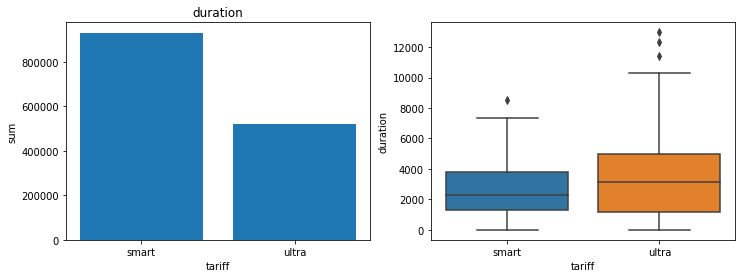

'gb_used'

,count,mean,median,std,min,max,sum,count_perc,sum_perc
tariff,,,,,,,,,
smart,350,104.0,99.0,60.3,12.0,270.0,36397.0,70.3,65.5
ultra,148,129.7,110.5,86.8,0.0,372.0,19202.0,29.7,34.5


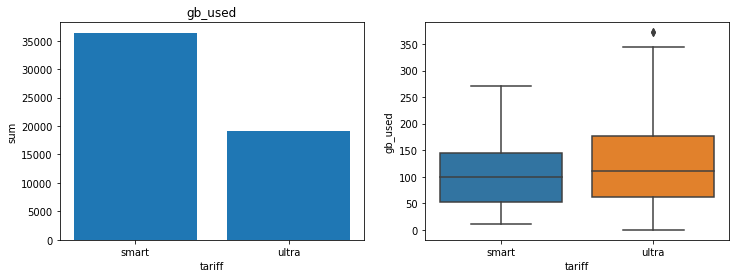

'count_messages'

,count,mean,median,std,min,max,sum,count_perc,sum_perc
tariff,,,,,,,,,
smart,350,212.6,141.0,223.3,0.0,1092.0,74413.0,70.3,60.5
ultra,148,328.5,251.0,337.8,0.0,1463.0,48623.0,29.7,39.5


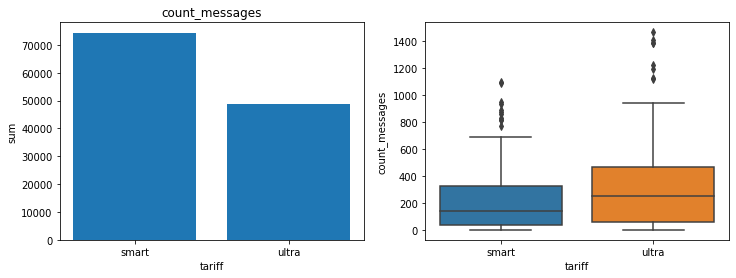

'rub_monthly_fee'

,count,mean,median,std,min,max,sum,count_perc,sum_perc
tariff,,,,,,,,,
smart,350,3502.7,3300,1868.8,550,6600,1225950,70.3,39.0
ultra,148,12978.0,13650,6359.4,1950,23400,1920750,29.7,61.0


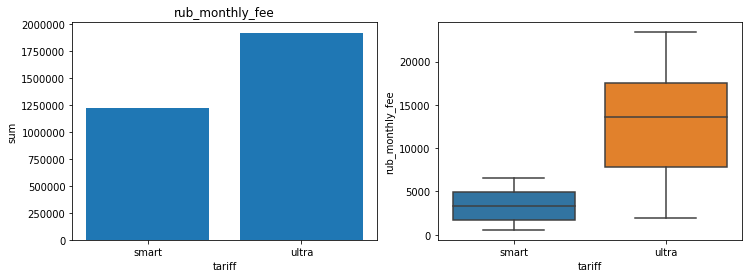

'calls_revenue'

,count,mean,median,std,min,max,sum,count_perc,sum_perc
tariff,,,,,,,,,
smart,350,794.9,204.0,1290.8,0.0,8082.0,278217.0,70.3,100.0
ultra,148,0.0,0.0,0.0,0.0,0.0,0.0,29.7,0.0


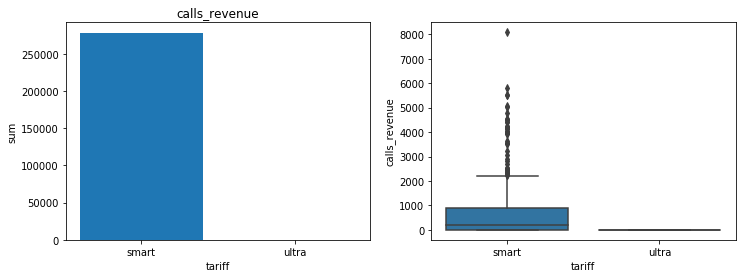

'internet_revenue'

,count,mean,median,std,min,max,sum,count_perc,sum_perc
tariff,,,,,,,,,
smart,350,3806.9,2800.0,3847.2,0.0,20200.0,1332400.0,70.3,91.8
ultra,148,799.7,0.0,1894.9,0.0,10950.0,118350.0,29.7,8.2


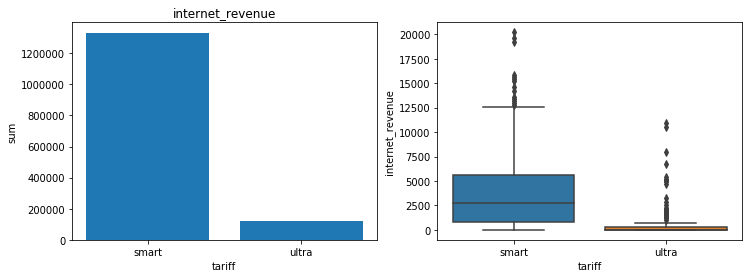

'messages_revenue'

,count,mean,median,std,min,max,sum,count_perc,sum_perc
tariff,,,,,,,,,
smart,350,110.8,0.0,259.7,0.0,1737.0,38784.0,70.3,100.0
ultra,148,0.0,0.0,0.0,0.0,0.0,0.0,29.7,0.0


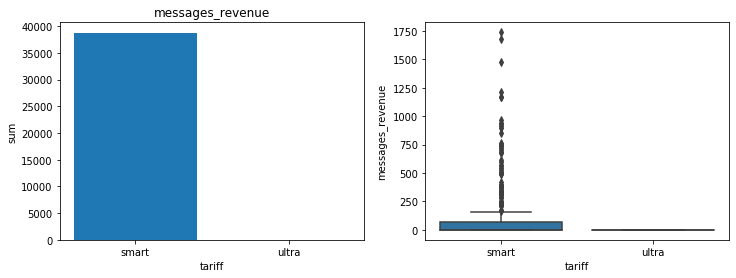

'total_revenue'

,count,mean,median,std,min,max,sum,count_perc,sum_perc
tariff,,,,,,,,,
smart,350,8215.3,7259.5,5404.3,550.0,28351.0,2875351.0,70.3,58.5
ultra,148,13777.7,13725.0,6867.3,1950.0,32400.0,2039100.0,29.7,41.5


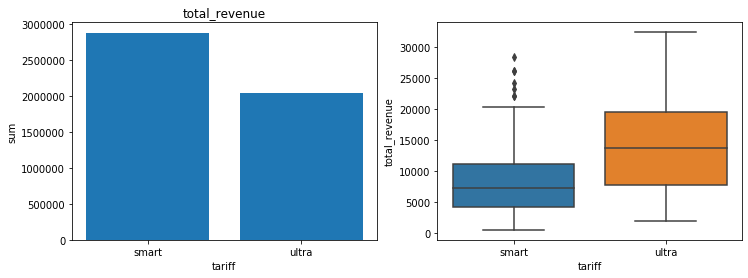

In [58]:
for i in df_year.columns[:-3]:
    display(i)

    tab = df_group[i].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'sum'])
    tab['count_perc'] = tab['count'] / tab['count'].sum() * 100
    tab['sum_perc'] = tab['sum'] / tab['sum'].sum() * 100
    display(tab.round(1))

    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.bar(tab.index, tab['sum'])
    plt.title(i)
    plt.xlabel('tariff')
    plt.ylabel('sum')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_year['tariff'].sort_values(), y=df_year[i])
    
    plt.show()

К тарифу Смарт подключены 350 человек (70% выборки), к тарифу Ультра 148 человек (30%).  
Средняя суммарная длительность звонков клиентов тарифа Смарт (2,7 тыс.мин) ниже, чем у клиентов Ультра (3,5 тыс.мин). Разброс длительности звонков у клиентов Ультра несколько выше.  
Пользователи тарифа Смарт суммарно использовали 36,4 тыс.Гб интернет трафика, тарифа Ультра - 19,2 тыс.Гб. В среднем каждый пользователь тарифа Смарт использовал 104 Гб интернета в год, тарифа Ультра - 130 Гб. Медианные значения отличаются меньше - 99 и 110 Гб соответственно, за счет более высокого разброса значений среди пользователей тарифа Ультра.  
Пользователи тарифа Ультра в среднем отправляют больше сообщений (328,5 сообщений в год против 219 сообщений у пользователей тарифа Смарт). Разброс по количеству сообщений также выше у клиентов Ультра.  
Суммарная выручка за счет фиксированной ежемесячной платы по пользователям тарифа Смарт составила 1,2 млн. руб (39% от суммарной выручки по данной категории платежей), пользователей Ультра - 1,9 млн.руб (61%). В среднем каждый абонент тарифного плана Смарт заплатил 3,5 тыс.руб фиксированных платежей, в среднем 13,5 тыс.руб заплатили пользователи тарифа Ультра.  
Ни один пользователь тарифа Ультра ни разу не воспользовался дополнительными минутами и дополнительными сообщениями сверх установленнго пакета. Пользователи тарифа Смарт заплатили в среднем 795 руб в год на дополнительные минуты и 111 руб в год на дополнительные сообщения, примечательно, что медианные значения этих показателей составляют 204 руб и 0 руб соответственно.  
Выручка за счет дополнительного интернет трафика составила по пользователям тарифа Смарт 1,3 млн.руб, т.е. даже несколько выше, чем суммарная выручка за счет абонентской платы по данным пользователям (1,2 млн.руб). В среднем каждый пользователь тарифа Смарт потратил 3,8 тыс.руб в год на дополнительный пакет интернета. Пользователи тарифа Ультра потратили всего по 800 руб.год, при этом медианное значение этого показателя равно нулю, т.е. большинство пользователей не воспользовались дополнительным интернет трафиком сверх установленного тарифом.  
Суммарная выручка с тарифа Смарт составила 2,9 млн. руб (58,5%), с тарифа Ультра 2,0 млн.руб (41,5%). Выручка с одного пользователя выше по тарифу Ультра и составляет 13,8 тыс. руб против 8,2 тыс. руб по тарифу Смарт. По тарифу Смарт пользователи заплатившие выше 20 тыс. руб в год единичны и составляют исключение (отстоят от 3-го квартиля на расстоянии выше 1,5 межквартильных интервала). Разброс выручки от пользователей тарифа Ультра выше.

In [59]:
df_pivot.head(5)

,user_id,month,count_calls,duration,count_session,gb_used,count_messages,calls_revenue,internet_revenue,messages_revenue,tariff,age,city,rub_monthly_fee,total_revenue
0,1000,5.0,22.0,159.0,5.0,3.0,22.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0
1,1000,6.0,43.0,172.0,49.0,23.0,60.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0
2,1000,7.0,47.0,340.0,29.0,14.0,75.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0
3,1000,8.0,52.0,408.0,29.0,14.0,81.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0
4,1000,9.0,58.0,466.0,27.0,15.0,57.0,0.0,0.0,0.0,ultra,52,Краснодар,1950,1950.0


Рассчитаем месячные показатели

In [60]:
df_pivot.pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count')

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
tariff,,,,,,,,,,,,
smart,34,58,77,112,141,164,201,235,260,294,316,337
ultra,9,24,37,55,67,84,91,107,115,123,134,139


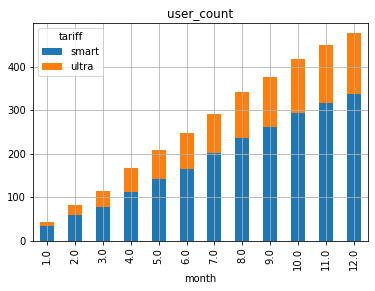

In [61]:
df_pivot.pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count').T.plot(kind='bar', 
                                                                                                stacked=True, 
                                                                                                grid=True, 
                                                                                                title='user_count');

Выборка представляет собой 500 пользователей, зарегистрировавшихся в течение года, соответственно их количество за каждый следующий месяц больше, чем в предыдущий.

Рассчитаем среднемесячную длительность звонков, объем интернет-трафика, количество сообщений и общую выручку в разрезе тарифов, а также динамику этих среднемесячных показателей в течение года

'duration'

,mean,std,var
tariff,,,
smart,417.934948,190.313730,36219.315784
ultra,526.623350,317.606098,100873.633397


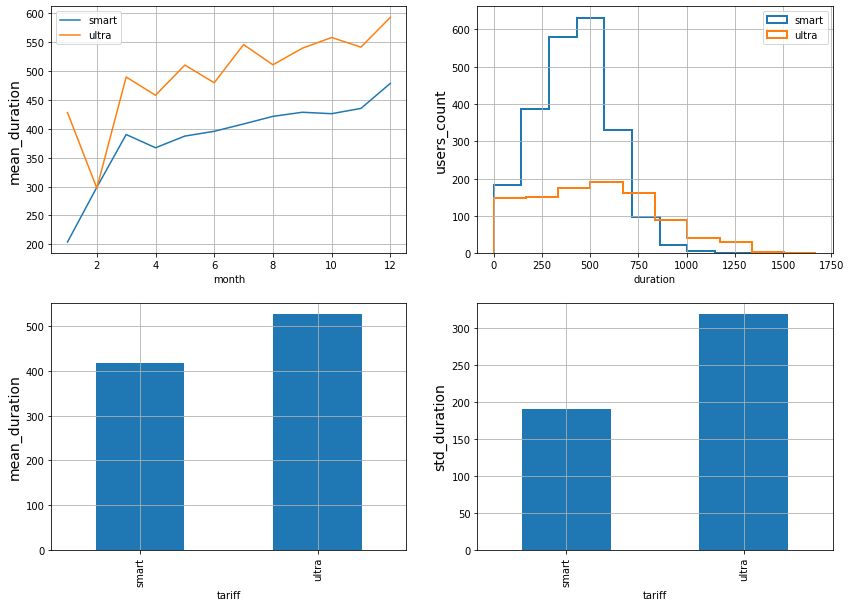

'gb_used'

,mean,std,var
tariff,,,
smart,16.328847,5.747061,33.028705
ultra,19.494416,9.853511,97.091686


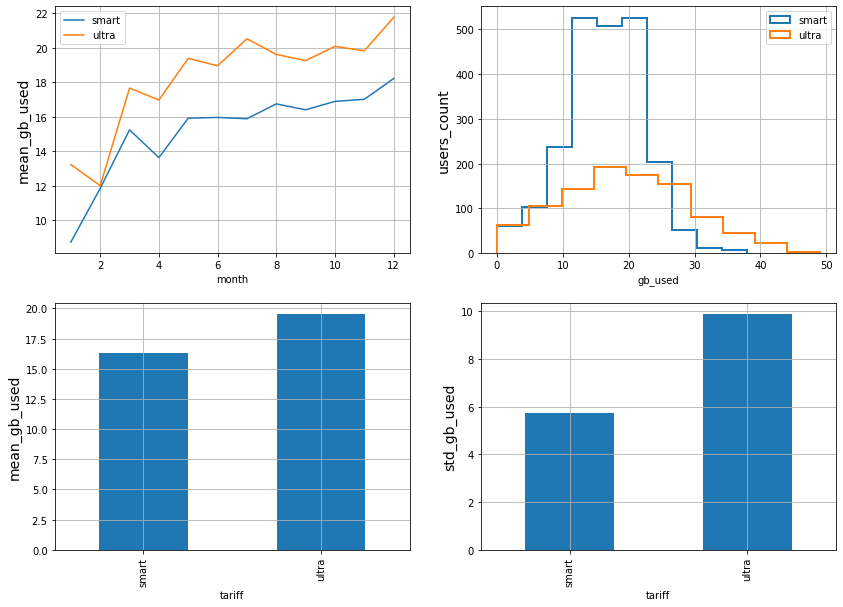

'count_messages'

,mean,std,var
tariff,,,
smart,33.384029,28.227876,796.812958
ultra,49.363452,47.804457,2285.266143


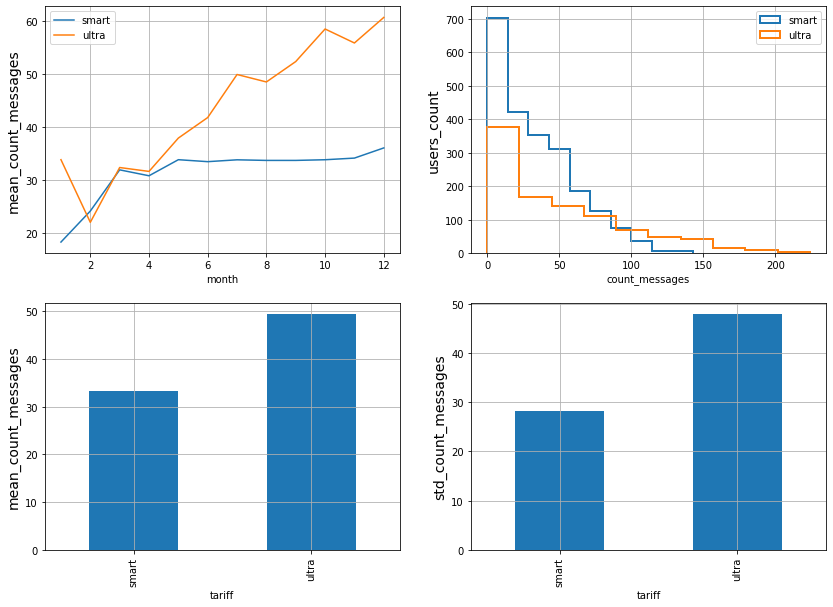

'total_revenue'

,mean,std,var
tariff,,,
smart,1289.973531,818.404367,669785.708006
ultra,2070.152284,376.187114,141516.745079


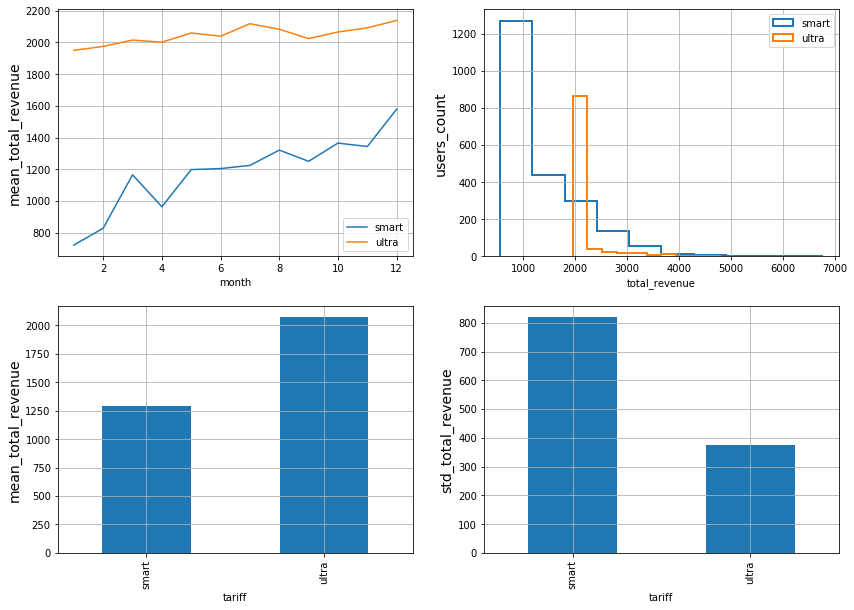

In [62]:
for i in ['duration', 'gb_used', 'count_messages', 'total_revenue']:
    df_month_mean = df_pivot.pivot_table(index='tariff', columns='month', values=i, aggfunc='mean')
       
    display(i)
    display(df_pivot.groupby('tariff')[i].agg(['mean', 'std', 'var']))
    
    plt.figure(figsize=(14,10))
    plt.subplot(2, 2, 1)
    plt.plot(df_month_mean.loc['smart'], label='smart')
    plt.plot(df_month_mean.loc['ultra'], label='ultra')
    plt.xlabel('month')
    plt.ylabel('mean_'+i, fontsize=14)
    plt.legend()
    plt.grid()

    plt.subplot(2, 2, 2)
    plt.hist(df_pivot[df_pivot['tariff'] == 'smart'][i], histtype='step', label='smart', lw=2)
    plt.hist(df_pivot[df_pivot['tariff'] == 'ultra'][i], histtype='step', label='ultra', lw=2)
    plt.xlabel(i)
    plt.ylabel('users_count', fontsize=14)
    plt.legend()
    plt.grid()

    plt.subplot(2, 2, 3)
    df_pivot.groupby('tariff')[i].mean().plot.bar()
    plt.ylabel('mean_'+i, fontsize=14)
    plt.grid()

    plt.subplot(2, 2, 4)
    df_pivot.groupby('tariff')[i].std().plot.bar()
    plt.ylabel('std_'+i, fontsize=14)
    plt.grid()

    plt.show()

По всем рассмотренным параметрам (длительность звонков, объем интернет трафика, количество сообщений, общая выручка) наблюдается рост среднемесячного объема потребления услуг в течение года (за исключением количества сообщений по тарифу Смарт, которое большу часть года составляла около 35 сообщений). Средние значения ежемесячного потребления услуг у пользователей тарифа Ультра выше, чем у пользователей Смарт - по длительности разговора на 26%, по объему интернет-трафика - на 19%, по количеству сообщений - на 48 %, по общей выручке - на 60%. Разброс значений по каждой из услуг выше у клиентов Ультра. По общей выручке разброс выше у пользователей Смарт. Дисперсии выборок по всем рассмотренным параметрам существенно различаются.

Рассмотрим распределение пользователей по возрасту и городу проживания

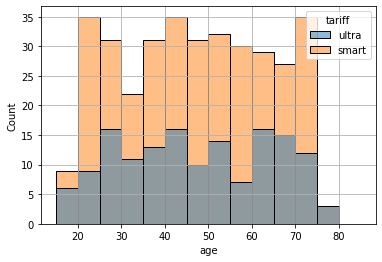

In [63]:
sns.histplot(df_year, x='age', hue='tariff', bins=14, binrange=(15,85))
plt.grid()

Пользователи от 20 до 75 лет достаточно ровно распределены в выборке. В этом диапазоне несколько выбивается количество пользователей Смарт в возрасте от 30 до 35 лет. Старше 75 лет количество пользователей резко падает.

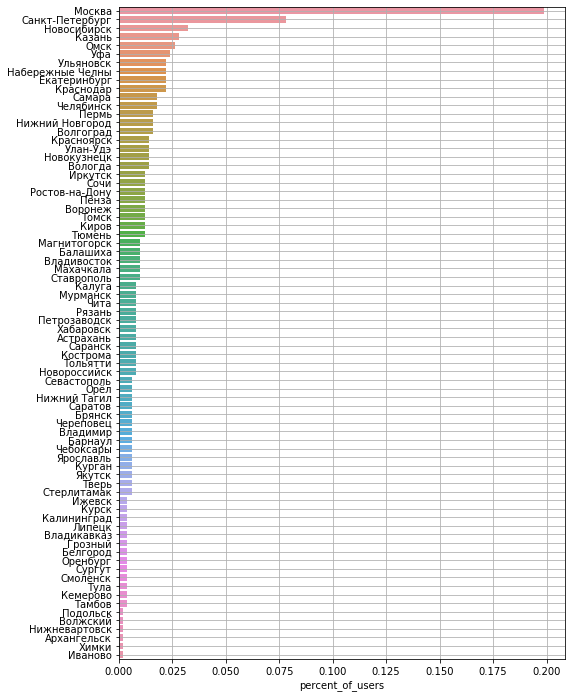

In [64]:
plt.figure(figsize=(8,12))
sns.barplot(y=df_year['city'].value_counts(normalize=True).index, x=df_year['city'].value_counts(normalize=True))
plt.xlabel('percent_of_users')
plt.grid()

Основная доля пользователей проживает в г. Москва (около 20%). Из С-Петербурга порядка 8% клиентов, из каждого из остальных городов  - мене 5%.

## Проверка гипотез

### Первая гипотеза

Как было сказано выше, средняя выручка клиентов Ультра существенно выше, чем у клиентов Смарт. Проверим статистическую значимость данных отличий.

Первая гипотеза звучит следующим образом: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза: средняя выручка пользователей Смарт и средняя выручка пользователей Ультра равны.  
Альтернативная гипотеза: средняя выручка пользователей Смарт и средняя выручка пользователей Ультра не равны.  
Гипотеза двухсторонняя, проверяем гипотезу о равенстве средних двух генеральных совокупностей. Выборки существенно различаются по размерам, их дисперсии также различаются. p-уровень примем соответсвущим высокому уровню статистической значимости (0,01).

In [65]:
sample_smart = df_pivot[df_pivot['tariff'] == 'smart']['total_revenue']
sample_ultra = df_pivot[df_pivot['tariff'] == 'ultra']['total_revenue']
results = st.ttest_ind(sample_smart, sample_ultra, equal_var = False)

In [66]:
alpha = 0.01
if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {results.pvalue}.Не получилось отвергнуть нулевую гипотезу')

p-value = 4.2606313931076085e-250. Отвергаем нулевую гипотезу


Значение p-value существенно меньше принятого уровня значимости. Нулевая гипотеза была бы отвергнута даже при установлении p-уровня значимости, равным 0,001, что, как правило, интерпретируется как высший уровень статистической значимости. 

### Вторая гипотеза

Проверим гипотезу о различии средних выручек пользователей из Москвы и из других регионов.

In [67]:
df_pivot['city_moscow'] = df_pivot['city'].apply(lambda x: 'moscow' if x == 'Москва' else 'not_moscow')

city_moscow
moscow        1546.713584
not_moscow    1524.936227
Name: total_revenue, dtype: float64

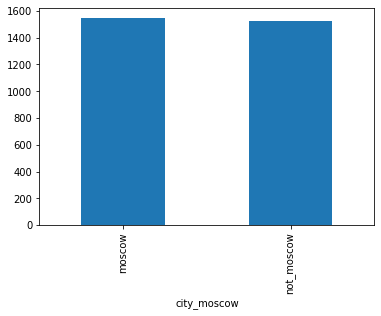

In [68]:
display(df_pivot.groupby('city_moscow')['total_revenue'].mean())
df_pivot.groupby('city_moscow')['total_revenue'].mean().plot.bar();

Средние ежемесячные выручки по пользователям из Москвы и других регионов отличаются слабо (примерно на 1,5%). Проверим статистическую значимость такого отклонения

In [69]:
df_pivot['city_moscow'].value_counts(normalize=True)

not_moscow    0.809894
moscow        0.190106
Name: city_moscow, dtype: float64

Нулевая гипотеза: средняя выручка пользователей из г.Москва и средняя выручка пользователей из других городов равны.  
Альтернативная гипотеза: средняя выручка пользователей из г.Москва и из других регионов не равны.  
Гипотеза двухсторонняя, проверяем гипотезу о равенстве средних двух генеральных совокупностей. Выборки существенно различаются по размерам (На долю Москвы приходится 19% первоначальной выборки, на оставшиеся города - 81%). p-уровень примем соответсвущим достоверному уровню статистической значимости (0,05).

In [70]:
sample_moscow = df_pivot[df_pivot['city_moscow'] == 'moscow']['total_revenue']
sample_not_moscow = df_pivot[df_pivot['city_moscow'] == 'not_moscow']['total_revenue']
results = st.ttest_ind(sample_moscow, sample_not_moscow, equal_var = False)

In [71]:
alpha = 0.05
if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {results.pvalue}.Не получилось отвергнуть нулевую гипотезу')

p-value = 0.5257376663729298.Не получилось отвергнуть нулевую гипотезу


Таким образом, различия в выручке от пользователй проживающих в Москве и в других регионах не являются статистически значимыми, даже для уровня значимости, соответствующему минимальной степени статистической значимости

## Выводы

В ходе проведенного исследования подготовлены и проанализированы данные 500 пользователей тарифных планов Смарт и Ультра за 2018 год.
На этапе подготовки данных произведено преобразование типов, объединение данных по пользователям, рассчитаны месячные показатели объемов использования услуг и суммарная выручка.  
На этапе разведочного анализа изучены характеристики пользователей по объемам использования услуг и общей выручки в зависимости от выбранного тарифа в годовом и месячном выражениях. Определены различия по длительности разговора, объему интернет-трафика, количеству сообщений и общей выручке для рассматриваемых групп пользователей по тарифным планам. Изучено распределение пользователей по возрасту и региону проживания.  
Проверены гипотезы о различии общей выручки между пользователями тарифных планов Смарт и Ультра и о различии общей выручки пользователей из Москвы и из других регионов. Различие общей выручки клиентов различных тарифов признана статистически значимой, различия в выручке от пользователей согласно второй гипотезе не являются статистически значимыми.